# HW04

## 20145071 Junghoon Seo

<img src='./Screenshot from 2016-11-12 09:14:43.png'>

In [1]:
from math import exp, sqrt
from __future__ import division

# Analytics functions

def real_x_1(t):
    return (2/3)*t + (2/3)*exp(-t) - (1/3)*exp(-100*t)

def real_x_2(t):
    return -(1/3)*t - (1/3)*exp(-t) + (2/3)*exp(-100*t)

In [2]:
import numpy as np

# Runge-Kutta Order Four
def runge_kutta(t_initial_value, x1_initial_value, x2_initial_value, step_size, solution_interval):
    t = t_initial_value
    h = step_size
    start = solution_interval[0]
    end = solution_interval[1]
    x1 = np.zeros(int((end-start)/h) + 1)
    x2 = np.zeros(int((end-start)/h) + 1)
    
    x1[0] = x1_initial_value
    x2[0] = x2_initial_value
    
    for i in range(1, int((end-start)/h) + 1):
        k_1 = h * f_row_1(t, x1[i-1], x2[i-1])
        k_2 = h * f_row_1(t + (h/2), x1[i-1] + k_1/2, x2[i-1] + k_1/2)
        k_3 = h * f_row_1(t + (h/2), x1[i-1] + k_2/2, x2[i-1] + k_2/2)
        k_4 = h * f_row_1(t + h, x1[i-1] + k_3, x2[i-1] + k_3)
        x1[i] = x1[i-1] + (k_1 + 2*k_2 + 2*k_3 + k_4)/6
        
        k_1 = h * f_row_2(t, x1[i-1], x2[i-1])
        k_2 = h * f_row_2(t + (h/2), x1[i-1] + k_1/2, x2[i-1] + k_1/2)
        k_3 = h * f_row_2(t + (h/2), x1[i-1] + k_2/2, x2[i-1] + k_2/2)
        k_4 = h * f_row_2(t + h, x1[i-1] + k_3, x2[i-1] + k_3)
        x2[i] = x2[i-1] + (k_1 + 2*k_2 + 2*k_3 + k_4)/6
        
        t += h
        
    return (x1, x2)

In [3]:
def f_row_1(t, x1, x2):
    return 32*float(x1) + 66*x2 + (2/3)*t + (2/3)

def f_row_2(t, x1, x2):
    return -66*float(x1) - 133*x2 - (1/3)*t - (1/3)

## Case 1 : h = 0.1

In [4]:
x_1, x_2 = runge_kutta(0, (1/3), (1/3), 0.1, (0., 0.5))

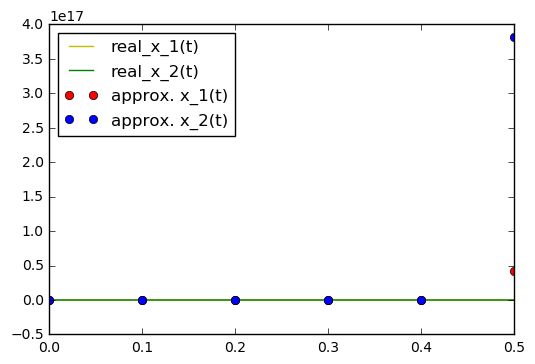

In [5]:
import matplotlib.pyplot as plt
import numpy as np

x_axis = np.linspace(0., 0.5, len(x_1))

x_1_point = map(lambda x, y: [x, y], x_axis, x_1)
x_2_point = map(lambda x, y: [x, y], x_axis, x_2)
real_x_1_point = map(lambda t: real_x_1(t), np.linspace(0., 0.5, 100000))
real_x_2_point = map(lambda t: real_x_2(t), np.linspace(0., 0.5, 100000))

plt.plot(np.linspace(0., 0.5, 100000), real_x_1_point, label = "x_1", color = 'y')
plt.plot(np.linspace(0., 0.5, 100000), real_x_2_point, label = "x_2", color = 'g')
plt.plot(*zip(*x_1_point), marker='o', color='r', ls='')
plt.plot(*zip(*x_2_point), marker='o', color='b', ls='')

plt.legend(['real_x_1(t)', 'real_x_2(t)', 'approx. x_1(t)', 'approx. x_2(t)'], loc='upper left')

plt.show()

### It's hard to read so let's see it seperately.

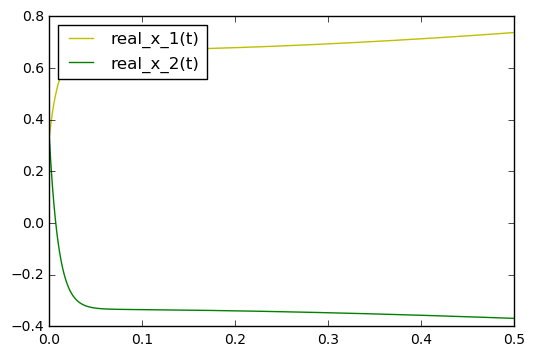

In [6]:
plt.hold(False)
plt.hold(True)
plt.plot(np.linspace(0., 0.5, 100000), real_x_1_point, label = "x_1", color = 'y')
plt.plot(np.linspace(0., 0.5, 100000), real_x_2_point, label = "x_2", color = 'g')

plt.legend(['real_x_1(t)', 'real_x_2(t)'], loc='upper left')

plt.show()

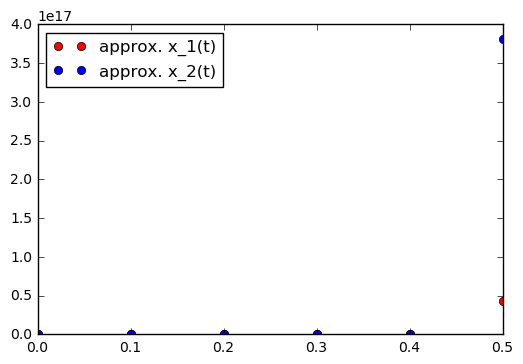

In [7]:
plt.hold(False)
plt.hold(True)
plt.plot(*zip(*x_1_point), marker='o', color='r', ls='')
plt.plot(*zip(*x_2_point), marker='o', color='b', ls='')

plt.legend(['approx. x_1(t)', 'approx. x_2(t)'], loc='upper left')

plt.show()

## It looks a bad approximation...

## Case 2 : h = 0.005

In [8]:
x_1, x_2 = runge_kutta(0, (1/3), (1/3), 0.005, (0., 0.5))

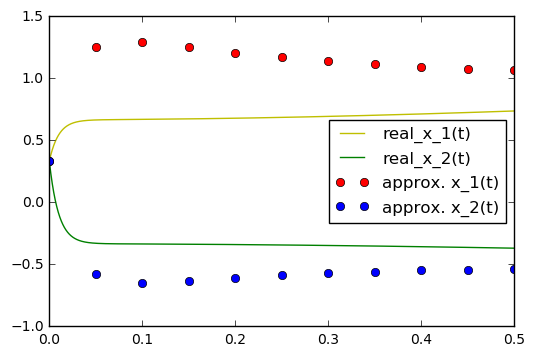

In [9]:
plt.hold(False)
plt.hold(True)

x_axis = np.linspace(0., 0.5, len(x_1))

x_1_point = map(lambda x, y: [x, y], x_axis, x_1)[::10]
x_2_point = map(lambda x, y: [x, y], x_axis, x_2)[::10]
real_x_1_point = map(lambda t: real_x_1(t), np.linspace(0., 0.5, 100000))
real_x_2_point = map(lambda t: real_x_2(t), np.linspace(0., 0.5, 100000))

plt.plot(np.linspace(0., 0.5, 100000), real_x_1_point, label = "x_1", color = 'y')
plt.plot(np.linspace(0., 0.5, 100000), real_x_2_point, label = "x_2", color = 'g')
plt.plot(*zip(*x_1_point), marker='o', color='r', ls='')
plt.plot(*zip(*x_2_point), marker='o', color='b', ls='')

plt.legend(['real_x_1(t)', 'real_x_2(t)', 'approx. x_1(t)', 'approx. x_2(t)'], loc='right')

plt.show()

## It also looks a bad approximation...
## How about the case of h = 1e-3?

## Case 3 : h = 0.001

In [10]:
x_1, x_2 = runge_kutta(0, (1/3), (1/3), 1e-3, (0., 0.5))

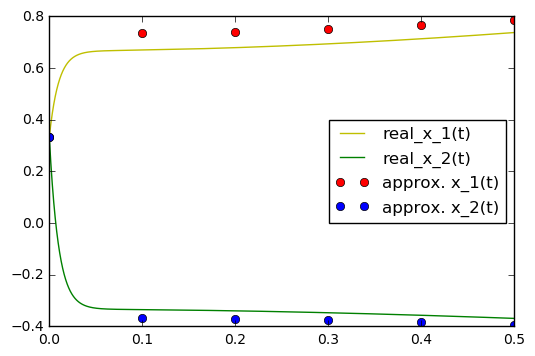

In [11]:
plt.hold(False)
plt.hold(True)

x_axis = np.linspace(0., 0.5, len(x_1))

x_1_point = map(lambda x, y: [x, y], x_axis, x_1)[::100]
x_2_point = map(lambda x, y: [x, y], x_axis, x_2)[::100]
real_x_1_point = map(lambda t: real_x_1(t), np.linspace(0., 0.5, 100000))
real_x_2_point = map(lambda t: real_x_2(t), np.linspace(0., 0.5, 100000))

plt.plot(np.linspace(0., 0.5, 100000), real_x_1_point, label = "x_1", color = 'y')
plt.plot(np.linspace(0., 0.5, 100000), real_x_2_point, label = "x_2", color = 'g')
plt.plot(*zip(*x_1_point), marker='o', color='r', ls='')
plt.plot(*zip(*x_2_point), marker='o', color='b', ls='')

plt.legend(['real_x_1(t)', 'real_x_2(t)', 'approx. x_1(t)', 'approx. x_2(t)'], loc='right')

plt.show()

### It looks a good tendency to approximate the real solution.

<img src='./Screenshot from 2016-11-12 09:15:22.png'>

In [12]:
import numpy as np
# round(x, 3) : two-digit rounding arithmetic

## (a) Gaussian elimination

In [13]:
from __future__ import division

def Gaussain(A, b):
    for i in range(A.shape[0]-1):
        most_coef = A[i+1][i] / A[i][i]
        A[i+1] -= most_coef*A[i]
        b[i+1] -= most_coef*b[i]

        
    t_range = list(range(A.shape[0]))
    del t_range[0]
    t_range.reverse()
    
    for i in t_range:

        most_coef = A[i-1][i] / A[i][i]
        A[i-1] -= most_coef*A[i] 
        b[i-1] -= most_coef*b[i]
    
    for i in range(A.shape[0]):
        b[i] /= A[i][i]
        A[i][i] = 1
        
    return b.T

In [14]:
X = np.array([[1, (1/2)], [(1/2), (1/3)]], dtype='float32')
x = np.array([[(5/21)], [(11/84)]], dtype='float32')

_ = X
__ = x

print(Gaussain(_, __))

[[ 0.16666663  0.14285721]]


## (b) Jacobi Iterative method

In [15]:
def Jacobi_Iter(A, b, x, n):
    D = np.diag(A)
    R = A - np.diagflat(D)
    
    for i in range(n):
        x = (b - np.dot(R, x))/ D
    return x

In [16]:
X = np.array([[1, (1/2)], [(1/2), (1/3)]], dtype='float32')
x = np.array([(5/21), (11/84)], dtype='float32')

_ = X
__ = x

print(Jacobi_Iter(_, __, np.array([0., 0.], dtype='float32'), 100))

[ 0.16666654  0.14285713]


## (c) Conjugate Gradient method

In [17]:
def Conjugate_Graident(A, b, x0, MAX_ITERATIONS = 100):  
    x = x0
    r0 = b - np.dot(A, x)
    p = r0

    for i in xrange(MAX_ITERATIONS):
        a = float(np.dot(r0.T, r0)/np.dot(np.dot(p.T, A), p))
        x = x + p*a
        ri = r0 - np.dot(A*a, p)

        b = float(np.dot(ri.T, ri)/np.dot(r0.T, r0))
        p = ri + b * p
        r0 = ri

    return x

In [18]:
X = np.array([[1, (1/2)], [(1/2), (1/3)]], dtype='float32')
x = np.array([(5/21), (11/84)], dtype='float32')

_ = X
__ = x

print(Conjugate_Graident(_, __, np.array([0., 0.], dtype='float32'), 5))

[ 0.16666661  0.14285724]


## (d) 

### Gaussian elimination always gives us exact solution.
### To get a proral numerical solution, Jacobi Iteration method needs more iteration than Conjugate Gradient method.
### (In my implementation, 100 vs. 5)

## (e) Conjugate Gradient method, again
###      C^(-1) = D^(-1/2)

In [19]:
X = np.array([[1, (1/2)], [(1/2), (1/3)]], dtype='float32')
x = np.array([(5/21), (11/84)], dtype='float32')

C_1 = np.power(np.diagflat(np.diag(X)), 1/2)

_ = np.matmul(np.matmul(C_1, X), C_1.T)
__ = np.matmul(C_1, x)

print(np.matmul(C_1, Conjugate_Graident(_, __, np.array([0., 0.], dtype='float32'), 5)))

[ 0.16666676  0.14285697]


### There is no improvement because A is not singular.